# Step 1: Data Understanding

## Dataset Analysis
- **Dataset**: northeast_states_disease_outbreaks.csv
- **Problem Type**: Regression (predicting number of cases)
- **Target Variable**: No_of_Cases

## Feature Categories:
- **Categorical Features**: State_UT, District, Disease_Illness, Current_Status
- **Temporal Features**: Date_of_Start_of_Outbreak, Date_of_Reporting  
- **Numerical Features**: No_of_Deaths (possibly others)

In [16]:
# Import essential libraries for data understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [17]:
# Load the dataset
print("📊 Loading northeast_states_disease_outbreaks.csv...")
df = pd.read_csv('northeast_states_disease_outbreaks.csv')

print(f"Dataset shape: {df.shape}")
print(f"✅ Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")

📊 Loading northeast_states_disease_outbreaks.csv...
Dataset shape: (199, 14)
✅ Dataset loaded successfully with 199 rows and 14 columns


In [18]:
# Display basic information about the dataset
print("🔍 DATASET OVERVIEW")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n📋 First 5 rows:")
print(df.head())

print("\n📊 Data Types:")
print(df.dtypes)

print("\n🎯 TARGET VARIABLE ANALYSIS")
print("=" * 50)
if 'No_of_Cases' in df.columns:
    print(f"Target: No_of_Cases")
    print(f"Min cases: {df['No_of_Cases'].min()}")
    print(f"Max cases: {df['No_of_Cases'].max()}")
    print(f"Mean cases: {df['No_of_Cases'].mean():.2f}")
    print(f"Median cases: {df['No_of_Cases'].median():.2f}")
else:
    print("❌ Target variable 'No_of_Cases' not found!")

🔍 DATASET OVERVIEW
Shape: (199, 14)
Columns: ['ID', 'Unique_ID', 'State_UT', 'District', 'Disease_Illness', 'No_of_Cases', 'No_of_Deaths', 'Date_of_Start_of_Outbreak', 'Date_of_Reporting', 'Current_Status', 'Comments_Action_Taken', 'Source_Table', 'Source_PDF', 'Northeast_State']

📋 First 5 rows:
   ID            Unique_ID           State_UT   District  \
0   1  AS/KMR/2020/01/0003              Assam     Kamrup   
1   2   AS/DHE/2023/27/669              Assam    Dhemaji   
2   3   AS/DAR/2023/28/717              Assam    Darrang   
3   4   AR/TWN/2023/30/813  Arunachal Pradesh     Tawang   
4   5   AS/LKM/2023/30/814              Assam  Lakhimpur   

           Disease_Illness  No_of_Cases  No_of_Deaths  \
0  Acute Diarrheal Disease         58.0           0.0   
1  Acute Diarrheal Disease          7.0           7.0   
2  Acute Diarrheal Disease          9.0           7.0   
3  Acute Diarrheal Disease         27.0           7.0   
4  Acute Diarrheal Disease         29.0           7.0   

In [19]:
# Analyze features by category
print("\n🏷️ CATEGORICAL FEATURES ANALYSIS")
print("=" * 50)

categorical_features = ['State_UT', 'District', 'Disease_Illness', 'Current_Status']
for feature in categorical_features:
    if feature in df.columns:
        unique_count = df[feature].nunique()
        print(f"{feature}: {unique_count} unique values")
        print(f"  Sample values: {list(df[feature].unique())[:5]}")
        if feature == 'State_UT':
            print(f"  All states: {list(df[feature].unique())}")
    else:
        print(f"❌ {feature} not found in dataset")

print("\n📅 TEMPORAL FEATURES ANALYSIS") 
print("=" * 50)

temporal_features = ['Date_of_Start_of_Outbreak', 'Date_of_Reporting']
for feature in temporal_features:
    if feature in df.columns:
        print(f"{feature}:")
        print(f"  Data type: {df[feature].dtype}")
        print(f"  Sample values: {df[feature].head(3).tolist()}")
        print(f"  Missing values: {df[feature].isnull().sum()}")
    else:
        print(f"❌ {feature} not found in dataset")

print("\n🔢 NUMERICAL FEATURES ANALYSIS")
print("=" * 50)

numerical_features = ['No_of_Deaths']
if 'No_of_Deaths' in df.columns:
    print("No_of_Deaths:")
    print(f"  Min: {df['No_of_Deaths'].min()}")
    print(f"  Max: {df['No_of_Deaths'].max()}")
    print(f"  Mean: {df['No_of_Deaths'].mean():.2f}")
    print(f"  Missing values: {df['No_of_Deaths'].isnull().sum()}")
else:
    print("❌ No_of_Deaths not found in dataset")

# Check for other numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nAll numerical columns found: {numeric_cols}")


🏷️ CATEGORICAL FEATURES ANALYSIS
State_UT: 5 unique values
  Sample values: ['Assam', 'Arunachal Pradesh', 'Meghalaya', 'Mizoram', 'Tripura']
  All states: ['Assam', 'Arunachal Pradesh', 'Meghalaya', 'Mizoram', 'Tripura']
District: 58 unique values
  Sample values: ['Kamrup', 'Dhemaji', 'Darrang', 'Tawang', 'Lakhimpur']
Disease_Illness: 18 unique values
  Sample values: ['Acute Diarrheal Disease', 'Food Poisoning', 'Hepatitis A', 'Cholera', 'Typhoid']
Current_Status: 5 unique values
  Sample values: ['Under Control', 'Under Surveillance', 'No new cases reported', 'Under Investigation', 'Under control']

📅 TEMPORAL FEATURES ANALYSIS
Date_of_Start_of_Outbreak:
  Data type: object
  Sample values: ['31-12-19', '01-07-23', '08-07-23']
  Missing values: 0
Date_of_Reporting:
  Data type: object
  Sample values: ['03-01-19', '08-07-23', '15-07-23']
  Missing values: 0

🔢 NUMERICAL FEATURES ANALYSIS
No_of_Deaths:
  Min: 0.0
  Max: 12.0
  Mean: 3.13
  Missing values: 0

All numerical columns f

In [20]:
# Data Quality Analysis
print("\n🔍 DATA QUALITY ANALYSIS")
print("=" * 50)

# Missing values analysis
print("Missing values per column:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✅ No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Basic statistics for numerical columns
if len(numeric_cols) > 0:
    print(f"\n📈 NUMERICAL FEATURES STATISTICS")
    print("=" * 50)
    print(df[numeric_cols].describe())


🔍 DATA QUALITY ANALYSIS
Missing values per column:
✅ No missing values found!

Duplicate rows: 0

📈 NUMERICAL FEATURES STATISTICS
               ID  No_of_Cases  No_of_Deaths  Source_Table
count  199.000000   199.000000    199.000000    199.000000
mean   100.000000    26.271357      3.130653      2.829146
std     57.590508    38.802358      3.881192      2.672523
min      1.000000     0.000000      0.000000      1.000000
25%     50.500000     8.000000      0.000000      2.000000
50%    100.000000    16.000000      1.000000      2.000000
75%    149.500000    29.000000      6.000000      3.000000
max    199.000000   282.000000     12.000000     26.000000


# Step 2: Data Preprocessing

## Preprocessing Tasks:
1. **Drop unnecessary columns**: Unique_ID, Comments_Action_Taken, Source_PDF
2. **Handle missing values**: No_of_Cases, No_of_Deaths  
3. **Convert dates**: Extract year, month, season from date columns
4. **Encode categorical variables**: 
   - One-hot encoding for State_UT, Disease_Illness
   - Label encoding for District (high cardinality)
5. **Scale numerical features** if required

In [21]:
# Step 2.1: Drop unnecessary columns
print("🗑️ DROPPING UNNECESSARY COLUMNS")
print("=" * 50)

columns_to_drop = ['Unique_ID', 'Comments_Action_Taken', 'Source_PDF']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

print(f"Columns to drop: {columns_to_drop}")
print(f"Columns found in dataset: {existing_columns_to_drop}")

if existing_columns_to_drop:
    df_clean = df.drop(columns=existing_columns_to_drop)
    print(f"✅ Dropped {len(existing_columns_to_drop)} columns")
    print(f"Original shape: {df.shape}")
    print(f"New shape: {df_clean.shape}")
else:
    df_clean = df.copy()
    print("ℹ️ No columns to drop found in dataset")

print(f"Remaining columns: {list(df_clean.columns)}")

🗑️ DROPPING UNNECESSARY COLUMNS
Columns to drop: ['Unique_ID', 'Comments_Action_Taken', 'Source_PDF']
Columns found in dataset: ['Unique_ID', 'Comments_Action_Taken', 'Source_PDF']
✅ Dropped 3 columns
Original shape: (199, 14)
New shape: (199, 11)
Remaining columns: ['ID', 'State_UT', 'District', 'Disease_Illness', 'No_of_Cases', 'No_of_Deaths', 'Date_of_Start_of_Outbreak', 'Date_of_Reporting', 'Current_Status', 'Source_Table', 'Northeast_State']


In [22]:
# Step 2.2: Handle missing values
print("\n🔧 HANDLING MISSING VALUES")
print("=" * 50)

# Check missing values in critical columns
target_cols = ['No_of_Cases', 'No_of_Deaths']
print("Missing values in critical columns:")
for col in target_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        missing_percent = (missing_count / len(df_clean)) * 100
        print(f"{col}: {missing_count} ({missing_percent:.1f}%)")
    else:
        print(f"{col}: Column not found")

# Handle missing values in No_of_Cases (target variable)
if 'No_of_Cases' in df_clean.columns:
    missing_cases = df_clean['No_of_Cases'].isnull().sum()
    if missing_cases > 0:
        print(f"\n⚠️ Found {missing_cases} missing values in target variable No_of_Cases")
        # For target variable, we might want to drop rows with missing values
        df_clean = df_clean.dropna(subset=['No_of_Cases'])
        print(f"✅ Dropped rows with missing No_of_Cases. New shape: {df_clean.shape}")
    else:
        print("✅ No missing values in No_of_Cases")

# Handle missing values in No_of_Deaths
if 'No_of_Deaths' in df_clean.columns:
    missing_deaths = df_clean['No_of_Deaths'].isnull().sum()
    if missing_deaths > 0:
        print(f"\n🔧 Found {missing_deaths} missing values in No_of_Deaths")
        # Fill missing deaths with 0 (assuming no deaths reported means 0 deaths)
        df_clean['No_of_Deaths'].fillna(0, inplace=True)
        print("✅ Filled missing No_of_Deaths with 0")
    else:
        print("✅ No missing values in No_of_Deaths")

print(f"\nFinal shape after missing value handling: {df_clean.shape}")


🔧 HANDLING MISSING VALUES
Missing values in critical columns:
No_of_Cases: 0 (0.0%)
No_of_Deaths: 0 (0.0%)
✅ No missing values in No_of_Cases
✅ No missing values in No_of_Deaths

Final shape after missing value handling: (199, 11)


In [23]:
# Step 2.3: Convert dates and extract temporal features
print("\n📅 PROCESSING DATE COLUMNS")
print("=" * 50)

date_columns = ['Date_of_Start_of_Outbreak', 'Date_of_Reporting']

def extract_temporal_features(df, date_col):
    """Extract year, month, and season from date column"""
    if date_col not in df.columns:
        print(f"❌ {date_col} not found in dataset")
        return df
    
    # Convert to datetime
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Extract features
    col_prefix = date_col.replace('Date_of_', '').replace('_', '_')
    df[f'{col_prefix}_Year'] = df[date_col].dt.year
    df[f'{col_prefix}_Month'] = df[date_col].dt.month
    
    # Extract season
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
    
    df[f'{col_prefix}_Season'] = df[f'{col_prefix}_Month'].apply(get_season)
    
    print(f"✅ Extracted temporal features from {date_col}")
    print(f"   - {col_prefix}_Year")
    print(f"   - {col_prefix}_Month") 
    print(f"   - {col_prefix}_Season")
    
    return df

# Process each date column
for date_col in date_columns:
    df_clean = extract_temporal_features(df_clean, date_col)

# Show sample of new temporal features
print(f"\n📊 Sample of temporal features:")
temporal_cols = [col for col in df_clean.columns if any(x in col for x in ['Year', 'Month', 'Season'])]
if temporal_cols:
    print(df_clean[temporal_cols].head())
    print(f"\nTemporal columns created: {temporal_cols}")
else:
    print("No temporal features were created")


📅 PROCESSING DATE COLUMNS
✅ Extracted temporal features from Date_of_Start_of_Outbreak
   - Start_of_Outbreak_Year
   - Start_of_Outbreak_Month
   - Start_of_Outbreak_Season
✅ Extracted temporal features from Date_of_Reporting
   - Reporting_Year
   - Reporting_Month
   - Reporting_Season

📊 Sample of temporal features:
   Start_of_Outbreak_Year  Start_of_Outbreak_Month Start_of_Outbreak_Season  \
0                    2019                       12                   Winter   
1                    2023                        1                   Winter   
2                    2023                        8                   Summer   
3                    2023                        7                   Summer   
4                    2023                        7                   Summer   

   Reporting_Year  Reporting_Month Reporting_Season  
0            2019                3           Spring  
1            2023                8           Summer  
2            2023                7      

In [24]:
# Step 2.4: Encode categorical variables
print("\n🏷️ ENCODING CATEGORICAL VARIABLES")
print("=" * 50)

from sklearn.preprocessing import LabelEncoder

# One-hot encoding for State_UT and Disease_Illness
onehot_columns = ['State_UT', 'Disease_Illness']
print("One-hot encoding for:", onehot_columns)

for col in onehot_columns:
    if col in df_clean.columns:
        unique_count = df_clean[col].nunique()
        print(f"\n{col}: {unique_count} unique values")
        print(f"Values: {list(df_clean[col].unique())}")
        
        # Create one-hot encoded columns
        onehot_encoded = pd.get_dummies(df_clean[col], prefix=col, drop_first=True)
        df_clean = pd.concat([df_clean, onehot_encoded], axis=1)
        
        # Drop original column
        df_clean = df_clean.drop(columns=[col])
        print(f"✅ One-hot encoded {col} into {len(onehot_encoded.columns)} columns")
    else:
        print(f"❌ {col} not found in dataset")

# Label encoding for District (high cardinality)
label_columns = ['District']
print(f"\nLabel encoding for high cardinality columns:", label_columns)

label_encoders = {}
for col in label_columns:
    if col in df_clean.columns:
        unique_count = df_clean[col].nunique()
        print(f"\n{col}: {unique_count} unique values")
        
        if unique_count > 10:  # Use label encoding for high cardinality
            le = LabelEncoder()
            df_clean[f'{col}_Encoded'] = le.fit_transform(df_clean[col])
            label_encoders[col] = le
            df_clean = df_clean.drop(columns=[col])
            print(f"✅ Label encoded {col} (high cardinality: {unique_count} values)")
        else:
            # Use one-hot for low cardinality
            onehot_encoded = pd.get_dummies(df_clean[col], prefix=col, drop_first=True)
            df_clean = pd.concat([df_clean, onehot_encoded], axis=1)
            df_clean = df_clean.drop(columns=[col])
            print(f"✅ One-hot encoded {col} (low cardinality: {unique_count} values)")
    else:
        print(f"❌ {col} not found in dataset")

# Handle Current_Status if it exists
if 'Current_Status' in df_clean.columns:
    unique_count = df_clean['Current_Status'].nunique()
    print(f"\nCurrent_Status: {unique_count} unique values")
    print(f"Values: {list(df_clean['Current_Status'].unique())}")
    
    if unique_count <= 5:  # One-hot for few categories
        onehot_encoded = pd.get_dummies(df_clean['Current_Status'], prefix='Current_Status', drop_first=True)
        df_clean = pd.concat([df_clean, onehot_encoded], axis=1)
        df_clean = df_clean.drop(columns=['Current_Status'])
        print("✅ One-hot encoded Current_Status")
    else:
        le = LabelEncoder()
        df_clean['Current_Status_Encoded'] = le.fit_transform(df_clean['Current_Status'])
        label_encoders['Current_Status'] = le
        df_clean = df_clean.drop(columns=['Current_Status'])
        print("✅ Label encoded Current_Status")

print(f"\n📊 Shape after encoding: {df_clean.shape}")
print(f"New columns: {list(df_clean.columns)}")


🏷️ ENCODING CATEGORICAL VARIABLES
One-hot encoding for: ['State_UT', 'Disease_Illness']

State_UT: 5 unique values
Values: ['Assam', 'Arunachal Pradesh', 'Meghalaya', 'Mizoram', 'Tripura']
✅ One-hot encoded State_UT into 4 columns

Disease_Illness: 18 unique values
Values: ['Acute Diarrheal Disease', 'Food Poisoning', 'Hepatitis A', 'Cholera', 'Typhoid', 'Dysentery', 'Acute Diarrheal Diseases', 'Acute Diarrheal Disease (Shigella)', 'Suspected Food Poisoning', 'Food Poisoning (Mushroom Poisoning)', 'Bacillary Dysentery', 'Food poisoning', 'Suspected Typhoid', 'Dysentery (Shigella)', 'Acute Diarrhoeal Diarrhoea', 'Acute Gastroenteritis', 'Acute Diarrhoeal Disease', 'Viral Hepatitis A']
✅ One-hot encoded Disease_Illness into 17 columns

Label encoding for high cardinality columns: ['District']

District: 58 unique values
✅ Label encoded District (high cardinality: 58 values)

Current_Status: 5 unique values
Values: ['Under Control', 'Under Surveillance', 'No new cases reported', 'Under I

In [25]:
# Step 2.5: Scale numerical features
print("\n📏 SCALING NUMERICAL FEATURES")
print("=" * 50)

from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding target variable)
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'No_of_Cases' in numerical_cols:
    numerical_cols.remove('No_of_Cases')  # Don't scale target variable

print(f"Numerical columns to scale: {numerical_cols}")

if len(numerical_cols) > 0:
    # Check if scaling is needed (different scales)
    print("\nNumerical features statistics before scaling:")
    print(df_clean[numerical_cols].describe())
    
    # Check if ranges are very different (indicating need for scaling)
    ranges = df_clean[numerical_cols].max() - df_clean[numerical_cols].min()
    max_range = ranges.max()
    min_range = ranges.min()
    
    if max_range / min_range > 10:  # If max range is 10x larger than min range
        print(f"\n⚠️ Large difference in feature scales detected (ratio: {max_range/min_range:.1f})")
        print("Applying StandardScaler...")
        
        scaler = StandardScaler()
        df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])
        
        print("✅ Numerical features scaled using StandardScaler")
        print("\nNumerical features statistics after scaling:")
        print(df_clean[numerical_cols].describe())
    else:
        print("✅ Feature scales are similar, no scaling needed")
        scaler = None
else:
    print("ℹ️ No numerical features found to scale")
    scaler = None

# Final preprocessing summary
print(f"\n🎯 PREPROCESSING SUMMARY")
print("=" * 50)
print(f"Final dataset shape: {df_clean.shape}")
print(f"Total features: {len(df_clean.columns) - 1}")  # -1 for target variable
print(f"Target variable: No_of_Cases")

# Separate features and target
if 'No_of_Cases' in df_clean.columns:
    X = df_clean.drop('No_of_Cases', axis=1)
    y = df_clean['No_of_Cases']
    
    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}")
    print(f"Target statistics:")
    print(f"  Min: {y.min()}")
    print(f"  Max: {y.max()}")
    print(f"  Mean: {y.mean():.2f}")
    print(f"  Std: {y.std():.2f}")
else:
    print("❌ Target variable No_of_Cases not found!")

print("\n✅ Data preprocessing completed successfully!")


📏 SCALING NUMERICAL FEATURES
Numerical columns to scale: ['ID', 'No_of_Deaths', 'Source_Table', 'Start_of_Outbreak_Year', 'Start_of_Outbreak_Month', 'Reporting_Year', 'Reporting_Month', 'District_Encoded']

Numerical features statistics before scaling:
               ID  No_of_Deaths  Source_Table  Start_of_Outbreak_Year  \
count  199.000000    199.000000    199.000000              199.000000   
mean   100.000000      3.130653      2.829146             2020.623116   
std     57.590508      3.881192      2.672523                2.803978   
min      1.000000      0.000000      1.000000             2017.000000   
25%     50.500000      0.000000      2.000000             2018.000000   
50%    100.000000      1.000000      2.000000             2020.000000   
75%    149.500000      6.000000      3.000000             2023.000000   
max    199.000000     12.000000     26.000000             2025.000000   

       Start_of_Outbreak_Month  Reporting_Year  Reporting_Month  \
count                

# Step 3: Feature Engineering

## Feature Engineering Tasks:
1. **Create lag features**: Cases in previous weeks/months for the same district
2. **Add seasonality indicators**: Monsoon vs dry season classification
3. **Add death ratio**: No_of_Deaths / No_of_Cases (mortality rate)

In [26]:
# Step 3.1: Create lag features - cases in previous weeks/months for same district
print("📈 CREATING LAG FEATURES")
print("=" * 50)

# First, we need to recreate the original date and district information for lag calculations
# We'll work with a copy that includes the original temporal information
df_lag = df_clean.copy()

# Add back the original date columns for lag calculation if they exist in original df
if 'Date_of_Start_of_Outbreak' in df.columns and 'District' in df.columns:
    # Merge back the original date and district info
    original_cols = ['Date_of_Start_of_Outbreak']
    if 'District' in df.columns:
        original_cols.append('District')
    
    # Add original columns temporarily for lag calculation
    for col in original_cols:
        if col in df.columns:
            df_lag[col] = df[col].copy()
    
    # Convert date to datetime for proper sorting
    df_lag['Date_of_Start_of_Outbreak'] = pd.to_datetime(df_lag['Date_of_Start_of_Outbreak'], errors='coerce')
    
    # Sort by district and date for lag calculation
    df_lag = df_lag.sort_values(['District', 'Date_of_Start_of_Outbreak']).reset_index(drop=True)
    
    print("✅ Prepared data for lag feature creation")
    print(f"Available for lag calculation: District and Date columns")
    
    # Create lag features for cases by district
    lag_periods = [1, 2, 3]  # 1, 2, 3 periods back
    
    for lag in lag_periods:
        # Create lag feature for cases within same district
        df_lag[f'Cases_Lag_{lag}'] = df_lag.groupby('District')['No_of_Cases'].shift(lag)
        print(f"✅ Created Cases_Lag_{lag} feature")
    
    # Create rolling mean features (average cases in last 2-3 periods)
    df_lag['Cases_Rolling_Mean_2'] = df_lag.groupby('District')['No_of_Cases'].rolling(window=2, min_periods=1).mean().reset_index(0, drop=True)
    df_lag['Cases_Rolling_Mean_3'] = df_lag.groupby('District')['No_of_Cases'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)
    
    print("✅ Created rolling mean features")
    
    # Create trend features (difference from previous period)
    df_lag['Cases_Diff_1'] = df_lag.groupby('District')['No_of_Cases'].diff(1)
    df_lag['Cases_Diff_2'] = df_lag.groupby('District')['No_of_Cases'].diff(2)
    
    print("✅ Created trend difference features")
    
    # Fill NaN values in lag features with 0 (for first occurrences)
    lag_columns = [col for col in df_lag.columns if 'Lag_' in col or 'Rolling_' in col or 'Diff_' in col]
    df_lag[lag_columns] = df_lag[lag_columns].fillna(0)
    
    # Remove temporary columns used for lag calculation
    df_lag = df_lag.drop(columns=['Date_of_Start_of_Outbreak', 'District'])
    
    print(f"\n📊 Lag features created: {lag_columns}")
    print(f"Shape after lag features: {df_lag.shape}")
    
else:
    print("⚠️ District or Date columns not available for lag feature creation")
    print("Proceeding without lag features...")
    df_lag = df_clean.copy()

📈 CREATING LAG FEATURES
✅ Prepared data for lag feature creation
Available for lag calculation: District and Date columns
✅ Created Cases_Lag_1 feature
✅ Created Cases_Lag_2 feature
✅ Created Cases_Lag_3 feature
✅ Created rolling mean features
✅ Created trend difference features

📊 Lag features created: ['Cases_Lag_1', 'Cases_Lag_2', 'Cases_Lag_3', 'Cases_Rolling_Mean_2', 'Cases_Rolling_Mean_3', 'Cases_Diff_1', 'Cases_Diff_2']
Shape after lag features: (199, 45)


In [34]:
# Step 3.2: Add seasonality indicators - monsoon vs dry season
print("\n🌧️ CREATING SEASONALITY INDICATORS")
print("=" * 50)

def get_monsoon_season(month):
    """
    Classify months into monsoon and dry seasons for Northeast India
    Monsoon: June to September (main monsoon season)
    Dry: October to May
    """
    if month in [6, 7, 8, 9]:  # June to September
        return 1  # Monsoon season
    else:
        return 0  # Dry season

# Create monsoon indicator using the month features we created earlier
month_columns = [col for col in df_lag.columns if 'Month' in col]
print(f"Found month columns: {month_columns}")

if month_columns:
    # Use the first available month column (likely from Start_of_Outbreak)
    month_col = month_columns[0]
    df_lag['Is_Monsoon_Season'] = df_lag[month_col].apply(get_monsoon_season)
    
    print(f"✅ Created monsoon season indicator using {month_col}")
    
    # Create additional seasonal features
    df_lag['Is_Peak_Monsoon'] = df_lag[month_col].apply(lambda x: 1 if x in [7, 8] else 0)  # July-August peak
    df_lag['Is_Pre_Monsoon'] = df_lag[month_col].apply(lambda x: 1 if x in [4, 5] else 0)  # April-May
    df_lag['Is_Post_Monsoon'] = df_lag[month_col].apply(lambda x: 1 if x in [10, 11] else 0)  # Oct-Nov
    df_lag['Is_Winter'] = df_lag[month_col].apply(lambda x: 1 if x in [12, 1, 2] else 0)  # Dec-Feb
    
    print("✅ Created detailed seasonal indicators:")
    print("   - Is_Monsoon_Season (Jun-Sep)")
    print("   - Is_Peak_Monsoon (Jul-Aug)")  
    print("   - Is_Pre_Monsoon (Apr-May)")
    print("   - Is_Post_Monsoon (Oct-Nov)")
    print("   - Is_Winter (Dec-Feb)")
    
    # Show distribution of seasonal indicators
    print(f"\n📊 Seasonal distribution:")
    seasonal_cols = ['Is_Monsoon_Season', 'Is_Peak_Monsoon', 'Is_Pre_Monsoon', 'Is_Post_Monsoon', 'Is_Winter']
    for col in seasonal_cols:
        count = df_lag[col].sum()
        percentage = (count / len(df_lag)) * 100
        print(f"{col}: {count} cases ({percentage:.1f}%)")
        
else:
    print("⚠️ No month columns found for seasonality indicators")
    # Create dummy seasonal features
    df_lag['Is_Monsoon_Season'] = 0
    print("Created dummy seasonality features")


🌧️ CREATING SEASONALITY INDICATORS
Found month columns: ['Start_of_Outbreak_Month', 'Reporting_Month', 'Original_Month']
✅ Created monsoon season indicator using Start_of_Outbreak_Month
✅ Created detailed seasonal indicators:
   - Is_Monsoon_Season (Jun-Sep)
   - Is_Peak_Monsoon (Jul-Aug)
   - Is_Pre_Monsoon (Apr-May)
   - Is_Post_Monsoon (Oct-Nov)
   - Is_Winter (Dec-Feb)

📊 Seasonal distribution:
Is_Monsoon_Season: 0 cases (0.0%)
Is_Peak_Monsoon: 0 cases (0.0%)
Is_Pre_Monsoon: 0 cases (0.0%)
Is_Post_Monsoon: 0 cases (0.0%)
Is_Winter: 0 cases (0.0%)


In [31]:
# Debug: Check month values and fix seasonal indicators
print("🔍 DEBUGGING SEASONAL INDICATORS")
print("=" * 50)

# Check what month columns we have and their values
month_columns = [col for col in df_lag.columns if 'Month' in col]
print(f"Available month columns: {month_columns}")

for month_col in month_columns:
    print(f"\n{month_col} - Unique values:")
    unique_months = sorted(df_lag[month_col].dropna().unique())
    print(f"Values: {unique_months}")
    print(f"Value counts:")
    print(df_lag[month_col].value_counts().sort_index())

# Check if we have any non-null month values
if month_columns:
    first_month_col = month_columns[0]
    non_null_months = df_lag[first_month_col].dropna()
    print(f"\n📊 Non-null month values in {first_month_col}: {len(non_null_months)}")
    
    if len(non_null_months) > 0:
        print("Sample month values:", non_null_months.head(10).tolist())
        
        # Recreate seasonal indicators with debugging
        print(f"\n🔧 Recreating seasonal indicators...")
        
        # Check the monsoon function with actual data
        test_months = [6, 7, 8, 9]  # Monsoon months
        for month in unique_months:
            is_monsoon = 1 if month in [6, 7, 8, 9] else 0
            count = (df_lag[first_month_col] == month).sum()
            print(f"Month {month}: {count} cases, Monsoon: {is_monsoon}")
        
        # Recreate seasonal features with corrected logic
        df_lag['Is_Monsoon_Season'] = df_lag[first_month_col].apply(lambda x: 1 if x in [6, 7, 8, 9] else 0)
        df_lag['Is_Peak_Monsoon'] = df_lag[first_month_col].apply(lambda x: 1 if x in [7, 8] else 0)
        df_lag['Is_Pre_Monsoon'] = df_lag[first_month_col].apply(lambda x: 1 if x in [4, 5] else 0)
        df_lag['Is_Post_Monsoon'] = df_lag[first_month_col].apply(lambda x: 1 if x in [10, 11] else 0)
        df_lag['Is_Winter'] = df_lag[first_month_col].apply(lambda x: 1 if x in [12, 1, 2] else 0)
        
        print(f"\n✅ Recreated seasonal indicators")
        
        # Show updated distribution
        print(f"\n📊 Updated seasonal distribution:")
        seasonal_cols = ['Is_Monsoon_Season', 'Is_Peak_Monsoon', 'Is_Pre_Monsoon', 'Is_Post_Monsoon', 'Is_Winter']
        for col in seasonal_cols:
            count = df_lag[col].sum()
            percentage = (count / len(df_lag)) * 100
            print(f"{col}: {count} cases ({percentage:.1f}%)")
            
    else:
        print("⚠️ No valid month values found! Checking original data...")
        
        # Let's check the original date columns
        if 'Date_of_Start_of_Outbreak' in df.columns:
            print("\n🔍 Checking original date column:")
            sample_dates = df['Date_of_Start_of_Outbreak'].head(10)
            print("Sample dates from original data:")
            print(sample_dates.tolist())
            
            # Try to extract month directly from original dates
            df['temp_date'] = pd.to_datetime(df['Date_of_Start_of_Outbreak'], errors='coerce')
            df['temp_month'] = df['temp_date'].dt.month
            
            print(f"\nExtracted months from original dates:")
            print(df['temp_month'].value_counts().sort_index())
            
            # Use the corrected month values
            df_lag['Corrected_Month'] = df['temp_month'].copy()
            
            # Create seasonal features using corrected months
            df_lag['Is_Monsoon_Season'] = df_lag['Corrected_Month'].apply(lambda x: 1 if pd.notna(x) and x in [6, 7, 8, 9] else 0)
            df_lag['Is_Peak_Monsoon'] = df_lag['Corrected_Month'].apply(lambda x: 1 if pd.notna(x) and x in [7, 8] else 0)
            df_lag['Is_Pre_Monsoon'] = df_lag['Corrected_Month'].apply(lambda x: 1 if pd.notna(x) and x in [4, 5] else 0)
            df_lag['Is_Post_Monsoon'] = df_lag['Corrected_Month'].apply(lambda x: 1 if pd.notna(x) and x in [10, 11] else 0)
            df_lag['Is_Winter'] = df_lag['Corrected_Month'].apply(lambda x: 1 if pd.notna(x) and x in [12, 1, 2] else 0)
            
            print(f"\n✅ Created seasonal indicators using corrected months")
            
            # Show final distribution
            print(f"\n📊 Final seasonal distribution:")
            seasonal_cols = ['Is_Monsoon_Season', 'Is_Peak_Monsoon', 'Is_Pre_Monsoon', 'Is_Post_Monsoon', 'Is_Winter']
            for col in seasonal_cols:
                count = df_lag[col].sum()
                percentage = (count / len(df_lag)) * 100
                print(f"{col}: {count} cases ({percentage:.1f}%)")
                
            # Clean up temporary columns
            df.drop(['temp_date', 'temp_month'], axis=1, inplace=True)
            
else:
    print("❌ No month columns found at all!")

🔍 DEBUGGING SEASONAL INDICATORS
Available month columns: ['Start_of_Outbreak_Month', 'Reporting_Month']

Start_of_Outbreak_Month - Unique values:
Values: [np.float64(-0.8289028957612765), np.float64(-0.5711659016105046), np.float64(-0.3134289074597327), np.float64(-0.0556919133089607), np.float64(0.20204508084181125), np.float64(0.4597820749925832), np.float64(0.7175190691433552), np.float64(0.9752560632941272), np.float64(1.232993057444899), np.float64(1.490730051595671), np.float64(1.748467045746443), np.float64(2.0062040398972147)]
Value counts:
Start_of_Outbreak_Month
-0.828903    92
-0.571166    15
-0.313429     8
-0.055692    10
 0.202045     9
 0.459782     5
 0.717519     6
 0.975256    15
 1.232993    10
 1.490730     5
 1.748467    12
 2.006204    12
Name: count, dtype: int64

Reporting_Month - Unique values:
Values: [np.float64(-2.1824442819225296), np.float64(-1.8057691630130905), np.float64(-1.4290940441036513), np.float64(-1.052418925194212), np.float64(-0.675743806284772

In [32]:
# Fix: Extract original month values before scaling
print("🔧 FIXING SEASONAL INDICATORS - EXTRACTING ORIGINAL MONTHS")
print("=" * 50)

# The month columns have been scaled! Let's get the original month values
# We need to extract months directly from the original date columns

if 'Date_of_Start_of_Outbreak' in df.columns:
    print("✅ Found original date column, extracting months...")
    
    # Extract month directly from original date
    df_temp = df.copy()
    df_temp['Date_of_Start_of_Outbreak'] = pd.to_datetime(df_temp['Date_of_Start_of_Outbreak'], errors='coerce')
    original_months = df_temp['Date_of_Start_of_Outbreak'].dt.month
    
    print("Original month distribution:")
    print(original_months.value_counts().sort_index())
    
    # Add the original month to our dataframe for seasonal features
    df_lag['Original_Month'] = original_months.copy()
    
    # Create seasonal indicators using ORIGINAL month values (1-12)
    print(f"\n🌧️ Creating seasonal indicators with original months...")
    
    def create_seasonal_features(month_series):
        """Create seasonal features using original month values (1-12)"""
        features = {}
        
        # Monsoon season (June to September = 6,7,8,9)
        features['Is_Monsoon_Season'] = month_series.apply(lambda x: 1 if pd.notna(x) and x in [6, 7, 8, 9] else 0)
        
        # Peak monsoon (July-August = 7,8)
        features['Is_Peak_Monsoon'] = month_series.apply(lambda x: 1 if pd.notna(x) and x in [7, 8] else 0)
        
        # Pre-monsoon (April-May = 4,5)
        features['Is_Pre_Monsoon'] = month_series.apply(lambda x: 1 if pd.notna(x) and x in [4, 5] else 0)
        
        # Post-monsoon (October-November = 10,11)
        features['Is_Post_Monsoon'] = month_series.apply(lambda x: 1 if pd.notna(x) and x in [10, 11] else 0)
        
        # Winter (December-February = 12,1,2)
        features['Is_Winter'] = month_series.apply(lambda x: 1 if pd.notna(x) and x in [12, 1, 2] else 0)
        
        return features
    
    # Create seasonal features
    seasonal_features = create_seasonal_features(df_lag['Original_Month'])
    
    # Add to dataframe
    for feature_name, feature_values in seasonal_features.items():
        df_lag[feature_name] = feature_values
    
    print("✅ Created seasonal indicators using original month values")
    
    # Show the mapping for verification
    print(f"\n📊 Month to season mapping verification:")
    for month in sorted(df_lag['Original_Month'].dropna().unique()):
        month_int = int(month)
        monsoon = 1 if month_int in [6, 7, 8, 9] else 0
        peak = 1 if month_int in [7, 8] else 0
        pre = 1 if month_int in [4, 5] else 0
        post = 1 if month_int in [10, 11] else 0
        winter = 1 if month_int in [12, 1, 2] else 0
        count = (df_lag['Original_Month'] == month).sum()
        
        season_name = "Monsoon" if monsoon else "Pre-Monsoon" if pre else "Post-Monsoon" if post else "Winter" if winter else "Other"
        print(f"Month {month_int}: {count} cases - {season_name}")
    
    # Show final corrected distribution
    print(f"\n📊 CORRECTED Seasonal distribution:")
    seasonal_cols = ['Is_Monsoon_Season', 'Is_Peak_Monsoon', 'Is_Pre_Monsoon', 'Is_Post_Monsoon', 'Is_Winter']
    for col in seasonal_cols:
        count = df_lag[col].sum()
        percentage = (count / len(df_lag)) * 100
        print(f"{col}: {count} cases ({percentage:.1f}%)")
    
    print("\n✅ Seasonal indicators fixed successfully!")
    
else:
    print("❌ Original date column not found!")
    print("Available columns in original df:", list(df.columns))

🔧 FIXING SEASONAL INDICATORS - EXTRACTING ORIGINAL MONTHS
✅ Found original date column, extracting months...
Original month distribution:
Date_of_Start_of_Outbreak
1     92
2     15
3      8
4     10
5      9
6      5
7      6
8     15
9     10
10     5
11    12
12    12
Name: count, dtype: int64

🌧️ Creating seasonal indicators with original months...
✅ Created seasonal indicators using original month values

📊 Month to season mapping verification:
Month 1: 92 cases - Winter
Month 2: 15 cases - Winter
Month 3: 8 cases - Other
Month 4: 10 cases - Pre-Monsoon
Month 5: 9 cases - Pre-Monsoon
Month 6: 5 cases - Monsoon
Month 7: 6 cases - Monsoon
Month 8: 15 cases - Monsoon
Month 9: 10 cases - Monsoon
Month 10: 5 cases - Post-Monsoon
Month 11: 12 cases - Post-Monsoon
Month 12: 12 cases - Winter

📊 CORRECTED Seasonal distribution:
Is_Monsoon_Season: 36 cases (18.1%)
Is_Peak_Monsoon: 21 cases (10.6%)
Is_Pre_Monsoon: 19 cases (9.5%)
Is_Post_Monsoon: 17 cases (8.5%)
Is_Winter: 119 cases (59.8%)

In [29]:
# Step 3.3: Add death ratio - mortality rate calculation
print("\n💀 CREATING DEATH RATIO FEATURES")
print("=" * 50)

# Calculate death ratio (mortality rate)
if 'No_of_Deaths' in df_lag.columns and 'No_of_Cases' in df_lag.columns:
    print("Calculating death ratio (No_of_Deaths / No_of_Cases)...")
    
    # Handle division by zero - replace with 0 when cases = 0
    df_lag['Death_Ratio'] = np.where(
        df_lag['No_of_Cases'] > 0,
        df_lag['No_of_Deaths'] / df_lag['No_of_Cases'],
        0
    )
    
    print("✅ Created Death_Ratio feature")
    
    # Create additional mortality-related features
    df_lag['Has_Deaths'] = (df_lag['No_of_Deaths'] > 0).astype(int)
    df_lag['High_Mortality'] = (df_lag['Death_Ratio'] > df_lag['Death_Ratio'].quantile(0.75)).astype(int)
    df_lag['Zero_Mortality'] = (df_lag['Death_Ratio'] == 0).astype(int)
    
    print("✅ Created additional mortality indicators:")
    print("   - Has_Deaths (binary indicator)")
    print("   - High_Mortality (top 25% mortality rate)")
    print("   - Zero_Mortality (no deaths recorded)")
    
    # Statistics for death ratio
    print(f"\n📊 Death Ratio Statistics:")
    print(f"Mean death ratio: {df_lag['Death_Ratio'].mean():.4f}")
    print(f"Median death ratio: {df_lag['Death_Ratio'].median():.4f}")
    print(f"Max death ratio: {df_lag['Death_Ratio'].max():.4f}")
    print(f"Cases with deaths: {df_lag['Has_Deaths'].sum()} ({(df_lag['Has_Deaths'].mean()*100):.1f}%)")
    print(f"Zero mortality cases: {df_lag['Zero_Mortality'].sum()} ({(df_lag['Zero_Mortality'].mean()*100):.1f}%)")
    
    # Handle any infinite or very large values
    df_lag['Death_Ratio'] = np.where(np.isinf(df_lag['Death_Ratio']), 0, df_lag['Death_Ratio'])
    df_lag['Death_Ratio'] = np.where(df_lag['Death_Ratio'] > 1, 1, df_lag['Death_Ratio'])  # Cap at 100%
    
    print("✅ Handled infinite values and capped death ratio at 100%")
    
else:
    print("⚠️ No_of_Deaths or No_of_Cases columns not found")
    df_lag['Death_Ratio'] = 0
    df_lag['Has_Deaths'] = 0
    df_lag['High_Mortality'] = 0
    df_lag['Zero_Mortality'] = 1
    print("Created dummy death ratio features")


💀 CREATING DEATH RATIO FEATURES
Calculating death ratio (No_of_Deaths / No_of_Cases)...
✅ Created Death_Ratio feature
✅ Created additional mortality indicators:
   - Has_Deaths (binary indicator)
   - High_Mortality (top 25% mortality rate)
   - Zero_Mortality (no deaths recorded)

📊 Death Ratio Statistics:
Mean death ratio: 0.0257
Median death ratio: -0.0139
Max death ratio: 2.2910
Cases with deaths: 75 (37.7%)
Zero mortality cases: 1 (0.5%)
✅ Handled infinite values and capped death ratio at 100%


In [30]:
# Step 3.4: Feature Engineering Summary
print("\n🔧 FEATURE ENGINEERING SUMMARY")
print("=" * 50)

# Update our feature set
df_features = df_lag.copy()

# Separate features and target for final summary
if 'No_of_Cases' in df_features.columns:
    X_engineered = df_features.drop('No_of_Cases', axis=1)
    y_engineered = df_features['No_of_Cases']
    
    print(f"Final feature set shape: {X_engineered.shape}")
    print(f"Target variable shape: {y_engineered.shape}")
    
    # Categorize the features we've created
    lag_features = [col for col in X_engineered.columns if 'Lag_' in col or 'Rolling_' in col or 'Diff_' in col]
    seasonal_features = [col for col in X_engineered.columns if 'Monsoon' in col or 'Peak_' in col or 'Pre_' in col or 'Post_' in col or 'Winter' in col]
    mortality_features = [col for col in X_engineered.columns if 'Death' in col or 'Mortality' in col]
    temporal_features = [col for col in X_engineered.columns if 'Year' in col or 'Month' in col or 'Season' in col]
    encoded_features = [col for col in X_engineered.columns if any(x in col for x in ['State_UT_', 'Disease_Illness_', 'District_', 'Current_Status_'])]
    
    print(f"\n📊 Feature Categories:")
    print(f"🕐 Lag Features ({len(lag_features)}): {lag_features}")
    print(f"🌧️ Seasonal Features ({len(seasonal_features)}): {seasonal_features}")
    print(f"💀 Mortality Features ({len(mortality_features)}): {mortality_features}")
    print(f"📅 Temporal Features ({len(temporal_features)}): {temporal_features}")
    print(f"🏷️ Encoded Features ({len(encoded_features)}): {len(encoded_features)} total")
    
    print(f"\n🎯 Total Features Created: {X_engineered.shape[1]}")
    print(f"Original features from preprocessing: {X.shape[1] if 'X' in locals() else 'N/A'}")
    print(f"New features added: {X_engineered.shape[1] - (X.shape[1] if 'X' in locals() else 0)}")
    
    # Check for any remaining missing values
    missing_features = X_engineered.isnull().sum()
    missing_features = missing_features[missing_features > 0]
    
    if len(missing_features) > 0:
        print(f"\n⚠️ Features with missing values:")
        print(missing_features)
    else:
        print(f"\n✅ No missing values in engineered features")
    
    # Basic statistics for new features
    if len(lag_features) > 0:
        print(f"\n📈 Lag Features Statistics:")
        print(X_engineered[lag_features].describe().round(3))
    
    if len(seasonal_features) > 0:
        print(f"\n🌧️ Seasonal Features Distribution:")
        for col in seasonal_features:
            count = X_engineered[col].sum()
            percentage = (count / len(X_engineered)) * 100
            print(f"  {col}: {count} ({percentage:.1f}%)")
    
    if len(mortality_features) > 0:
        print(f"\n💀 Mortality Features Statistics:")
        print(X_engineered[mortality_features].describe().round(4))
        
else:
    print("❌ Target variable No_of_Cases not found!")

print("\n✅ Feature engineering completed successfully!")
print("=" * 50)


🔧 FEATURE ENGINEERING SUMMARY
Final feature set shape: (199, 53)
Target variable shape: (199,)

📊 Feature Categories:
🕐 Lag Features (7): ['Cases_Lag_1', 'Cases_Lag_2', 'Cases_Lag_3', 'Cases_Rolling_Mean_2', 'Cases_Rolling_Mean_3', 'Cases_Diff_1', 'Cases_Diff_2']
🌧️ Seasonal Features (5): ['Is_Monsoon_Season', 'Is_Peak_Monsoon', 'Is_Pre_Monsoon', 'Is_Post_Monsoon', 'Is_Winter']
💀 Mortality Features (5): ['No_of_Deaths', 'Death_Ratio', 'Has_Deaths', 'High_Mortality', 'Zero_Mortality']
📅 Temporal Features (7): ['Start_of_Outbreak_Year', 'Start_of_Outbreak_Month', 'Start_of_Outbreak_Season', 'Reporting_Year', 'Reporting_Month', 'Reporting_Season', 'Is_Monsoon_Season']
🏷️ Encoded Features (26): 26 total

🎯 Total Features Created: 53
Original features from preprocessing: 38
New features added: 15

✅ No missing values in engineered features

📈 Lag Features Statistics:
       Cases_Lag_1  Cases_Lag_2  Cases_Lag_3  Cases_Rolling_Mean_2  \
count      199.000      199.000      199.000          

# Step 4: Model Building

## Model Requirements:
- **Target Performance**: 
  - Accuracy: At least 85% (R² score ≥ 0.85)
  - RMSE: Between 5 to 10
- **Models to implement**:
  1. **LinearRegression** (baseline model)
  2. **RandomForestRegressor** 
  3. **XGBoostRegressor**
- **Evaluation**: Train/test split with cross-validation

In [43]:
# Step 4.1: Prepare data for modeling
print("🎯 PREPARING DATA FOR MODEL BUILDING")
print("=" * 50)

# Import required libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

# Try to import XGBoost, use GradientBoostingRegressor as fallback
try:
    import xgboost as xgb
    xgb_available = True
    print("✅ XGBoost imported successfully")
except (ImportError, ValueError) as e:
    print(f"⚠️ XGBoost import failed: {str(e)}")
    print("Using GradientBoostingRegressor as alternative")
    xgb_available = False

print("✅ Modeling libraries imported")

# Prepare final dataset for modeling
# Use the engineered features from previous steps
if 'df_lag' in locals() and 'No_of_Cases' in df_lag.columns:
    # Remove any debugging/temporary columns
    columns_to_remove = ['Original_Month', 'Corrected_Month']
    df_model = df_lag.copy()
    
    for col in columns_to_remove:
        if col in df_model.columns:
            df_model = df_model.drop(columns=[col])
            print(f"Removed temporary column: {col}")
    
    # Separate features and target
    X_final = df_model.drop('No_of_Cases', axis=1)
    y_final = df_model['No_of_Cases']
    
    print(f"\n📊 Final dataset for modeling:")
    print(f"Features (X) shape: {X_final.shape}")
    print(f"Target (y) shape: {y_final.shape}")
    print(f"Feature count: {X_final.shape[1]}")
    
    # Check for any remaining missing values
    missing_count = X_final.isnull().sum().sum()
    if missing_count > 0:
        print(f"⚠️ Found {missing_count} missing values in features")
        X_final = X_final.fillna(0)
        print("✅ Filled missing values with 0")
    else:
        print("✅ No missing values in features")
    
    # Display target variable statistics
    print(f"\n🎯 Target variable statistics:")
    print(f"Min cases: {y_final.min()}")
    print(f"Max cases: {y_final.max()}")
    print(f"Mean cases: {y_final.mean():.2f}")
    print(f"Median cases: {y_final.median():.2f}")
    print(f"Std deviation: {y_final.std():.2f}")
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_final, y_final, 
        test_size=0.2, 
        random_state=42, 
        stratify=None  # For regression
    )
    
    print(f"\n📊 Train/Test split:")
    print(f"Training set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X_final)*100):.1f}%)")
    print(f"Test set: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X_final)*100):.1f}%)")
    
    print("\n✅ Data preparation completed successfully!")
    
else:
    print("❌ Engineered dataset not found! Please run previous steps first.")
    X_final = None

🎯 PREPARING DATA FOR MODEL BUILDING
⚠️ XGBoost import failed: Mismatched version between the Python package and the native shared object.  Python package version: 3.0.1. Shared object version: 3.0.4. Shared object is loaded from: f:\anaconda\Lib\site-packages\xgboost\lib\xgboost.dll.
Likely cause:
  * XGBoost is first installed with anaconda then upgraded with pip. To fix it please remove one of the installations.
Using GradientBoostingRegressor as alternative
✅ Modeling libraries imported
Removed temporary column: Original_Month

📊 Final dataset for modeling:
Features (X) shape: (199, 53)
Target (y) shape: (199,)
Feature count: 53
✅ No missing values in features

🎯 Target variable statistics:
Min cases: 0.0
Max cases: 282.0
Mean cases: 26.27
Median cases: 16.00
Std deviation: 38.80

📊 Train/Test split:
Training set: 159 samples (79.9%)
Test set: 40 samples (20.1%)

✅ Data preparation completed successfully!


In [47]:
# Debug: Check and fix data types for modeling
print("🔍 CHECKING AND FIXING DATA TYPES")
print("=" * 50)

print("Data types in X_final:")
print(X_final.dtypes.value_counts())

# Identify problematic columns (datetime, object, etc.)
datetime_cols = X_final.select_dtypes(include=['datetime64']).columns.tolist()
object_cols = X_final.select_dtypes(include=['object']).columns.tolist()

print(f"\nDatetime columns found: {datetime_cols}")
print(f"Object columns found: {object_cols}")

if datetime_cols or object_cols:
    print(f"\n🔧 Fixing problematic columns...")
    
    # Remove datetime columns as they should have been converted to features already
    if datetime_cols:
        print(f"Removing datetime columns: {datetime_cols}")
        X_final = X_final.drop(columns=datetime_cols)
    
    # Handle object columns (convert to category codes if needed)
    for col in object_cols:
        if col in X_final.columns:
            print(f"Converting object column '{col}' to numeric...")
            if X_final[col].dtype == 'object':
                # Try to convert to numeric, if fails convert to category codes
                try:
                    X_final[col] = pd.to_numeric(X_final[col], errors='coerce')
                    if X_final[col].isnull().any():
                        X_final[col] = X_final[col].fillna(0)
                except:
                    X_final[col] = pd.Categorical(X_final[col]).codes
    
    # Update the train/test split with cleaned data
    X_train, X_test, y_train, y_test = train_test_split(
        X_final, y_final, 
        test_size=0.2, 
        random_state=42, 
        stratify=None
    )
    
    print(f"\n✅ Data types fixed!")
    print(f"Updated X_final shape: {X_final.shape}")
    print(f"Updated data types:")
    print(X_final.dtypes.value_counts())
    
else:
    print("✅ No problematic data types found!")

print(f"\nFinal check - All numeric columns: {X_final.select_dtypes(include=[np.number]).shape[1] == X_final.shape[1]}")

🔍 CHECKING AND FIXING DATA TYPES
Data types in X_final:
int64      33
float64    19
Name: count, dtype: int64

Datetime columns found: []
Object columns found: []
✅ No problematic data types found!

Final check - All numeric columns: True


In [45]:
# Final conversion: Ensure all columns are numeric
print("\n🔧 FINAL DATA TYPE CONVERSION")
print("=" * 50)

# Convert boolean columns to int
bool_cols = X_final.select_dtypes(include=['bool']).columns.tolist()
if bool_cols:
    print(f"Converting {len(bool_cols)} boolean columns to int...")
    X_final[bool_cols] = X_final[bool_cols].astype(int)

# Final verification
print(f"Final data types:")
print(X_final.dtypes.value_counts())

# Ensure no missing values
if X_final.isnull().any().any():
    print("⚠️ Found missing values, filling with 0...")
    X_final = X_final.fillna(0)

# Update train/test split one final time
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=None
)

print(f"\n✅ All data types are now numeric!")
print(f"Final X_final shape: {X_final.shape}")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"All numeric check: {X_final.select_dtypes(include=[np.number]).shape[1] == X_final.shape[1]}")


🔧 FINAL DATA TYPE CONVERSION
Converting 25 boolean columns to int...
Final data types:
int64      33
float64    19
Name: count, dtype: int64

✅ All data types are now numeric!
Final X_final shape: (199, 52)
Training set: (159, 52)
Test set: (40, 52)
All numeric check: True


In [46]:
# Step 4.2: Model 1 - LinearRegression (Baseline)
print("\n📊 MODEL 1: LINEAR REGRESSION (BASELINE)")
print("=" * 50)

if X_final is not None:
    # Initialize Linear Regression
    lr_model = LinearRegression()
    
    # Measure training time
    start_time = time.time()
    
    # Train the model
    lr_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    # Make predictions
    y_train_pred_lr = lr_model.predict(X_train)
    y_test_pred_lr = lr_model.predict(X_test)
    
    # Calculate metrics
    train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
    test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
    train_r2_lr = r2_score(y_train, y_train_pred_lr)
    test_r2_lr = r2_score(y_test, y_test_pred_lr)
    train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
    test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
    
    # Cross-validation
    cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
    cv_rmse_scores_lr = np.sqrt(-cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    
    print(f"⏱️ Training time: {training_time:.3f} seconds")
    print(f"\n📈 Training Performance:")
    print(f"  RMSE: {train_rmse_lr:.3f}")
    print(f"  R² Score: {train_r2_lr:.3f} ({train_r2_lr*100:.1f}%)")
    print(f"  MAE: {train_mae_lr:.3f}")
    
    print(f"\n🧪 Test Performance:")
    print(f"  RMSE: {test_rmse_lr:.3f}")
    print(f"  R² Score: {test_r2_lr:.3f} ({test_r2_lr*100:.1f}%)")
    print(f"  MAE: {test_mae_lr:.3f}")
    
    print(f"\n🔄 Cross-Validation (5-fold):")
    print(f"  Mean R² Score: {cv_scores_lr.mean():.3f} ± {cv_scores_lr.std():.3f}")
    print(f"  Mean RMSE: {cv_rmse_scores_lr.mean():.3f} ± {cv_rmse_scores_lr.std():.3f}")
    
    # Check if meets requirements
    meets_r2_req = test_r2_lr >= 0.85
    meets_rmse_req = 5 <= test_rmse_lr <= 10
    
    print(f"\n🎯 Performance Requirements Check:")
    print(f"  R² ≥ 85%: {'✅ PASS' if meets_r2_req else '❌ FAIL'} ({test_r2_lr*100:.1f}%)")
    print(f"  RMSE 5-10: {'✅ PASS' if meets_rmse_req else '❌ FAIL'} ({test_rmse_lr:.3f})")
    
    # Store results for comparison
    lr_results = {
        'model_name': 'LinearRegression',
        'train_rmse': train_rmse_lr,
        'test_rmse': test_rmse_lr,
        'train_r2': train_r2_lr,
        'test_r2': test_r2_lr,
        'cv_r2_mean': cv_scores_lr.mean(),
        'cv_rmse_mean': cv_rmse_scores_lr.mean(),
        'training_time': training_time,
        'meets_requirements': meets_r2_req and meets_rmse_req
    }
    
    print(f"\n✅ Linear Regression baseline completed!")
else:
    print("❌ Cannot train model - data not prepared!")


📊 MODEL 1: LINEAR REGRESSION (BASELINE)
⏱️ Training time: 0.108 seconds

📈 Training Performance:
  RMSE: 0.000
  R² Score: 1.000 (100.0%)
  MAE: 0.000

🧪 Test Performance:
  RMSE: 0.000
  R² Score: 1.000 (100.0%)
  MAE: 0.000

🔄 Cross-Validation (5-fold):
  Mean R² Score: 1.000 ± 0.000
  Mean RMSE: 0.000 ± 0.000

🎯 Performance Requirements Check:
  R² ≥ 85%: ✅ PASS (100.0%)
  RMSE 5-10: ❌ FAIL (0.000)

✅ Linear Regression baseline completed!


In [48]:
# Step 4.3: Model 2 - RandomForestRegressor
print("\n🌲 MODEL 2: RANDOM FOREST REGRESSOR")
print("=" * 50)

if X_final is not None:
    # Initialize Random Forest with optimized parameters
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    
    # Measure training time
    start_time = time.time()
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    # Make predictions
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)
    
    # Calculate metrics
    train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
    test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
    train_r2_rf = r2_score(y_train, y_train_pred_rf)
    test_r2_rf = r2_score(y_test, y_test_pred_rf)
    train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
    test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
    
    # Cross-validation
    cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
    cv_rmse_scores_rf = np.sqrt(-cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    
    print(f"⏱️ Training time: {training_time:.3f} seconds")
    print(f"\n📈 Training Performance:")
    print(f"  RMSE: {train_rmse_rf:.3f}")
    print(f"  R² Score: {train_r2_rf:.3f} ({train_r2_rf*100:.1f}%)")
    print(f"  MAE: {train_mae_rf:.3f}")
    
    print(f"\n🧪 Test Performance:")
    print(f"  RMSE: {test_rmse_rf:.3f}")
    print(f"  R² Score: {test_r2_rf:.3f} ({test_r2_rf*100:.1f}%)")
    print(f"  MAE: {test_mae_rf:.3f}")
    
    print(f"\n🔄 Cross-Validation (5-fold):")
    print(f"  Mean R² Score: {cv_scores_rf.mean():.3f} ± {cv_scores_rf.std():.3f}")
    print(f"  Mean RMSE: {cv_rmse_scores_rf.mean():.3f} ± {cv_rmse_scores_rf.std():.3f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_final.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🔝 Top 10 Most Important Features:")
    for i, row in feature_importance.head(10).iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")
    
    # Check if meets requirements
    meets_r2_req = test_r2_rf >= 0.85
    meets_rmse_req = 5 <= test_rmse_rf <= 10
    
    print(f"\n🎯 Performance Requirements Check:")
    print(f"  R² ≥ 85%: {'✅ PASS' if meets_r2_req else '❌ FAIL'} ({test_r2_rf*100:.1f}%)")
    print(f"  RMSE 5-10: {'✅ PASS' if meets_rmse_req else '❌ FAIL'} ({test_rmse_rf:.3f})")
    
    # Store results for comparison
    rf_results = {
        'model_name': 'RandomForestRegressor',
        'train_rmse': train_rmse_rf,
        'test_rmse': test_rmse_rf,
        'train_r2': train_r2_rf,
        'test_r2': test_r2_rf,
        'cv_r2_mean': cv_scores_rf.mean(),
        'cv_rmse_mean': cv_rmse_scores_rf.mean(),
        'training_time': training_time,
        'meets_requirements': meets_r2_req and meets_rmse_req,
        'feature_importance': feature_importance
    }
    
    print(f"\n✅ Random Forest model completed!")
else:
    print("❌ Cannot train model - data not prepared!")


🌲 MODEL 2: RANDOM FOREST REGRESSOR
⏱️ Training time: 0.355 seconds

📈 Training Performance:
  RMSE: 12.388
  R² Score: 0.903 (90.3%)
  MAE: 3.058

🧪 Test Performance:
  RMSE: 18.114
  R² Score: 0.716 (71.6%)
  MAE: 7.188

🔄 Cross-Validation (5-fold):
  Mean R² Score: 0.289 ± 0.993
  Mean RMSE: 20.732 ± 13.219

🔝 Top 10 Most Important Features:
  Cases_Rolling_Mean_2: 0.6172
  Cases_Diff_1: 0.1834
  Cases_Rolling_Mean_3: 0.1476
  Death_Ratio: 0.0207
  Cases_Diff_2: 0.0177
  Cases_Lag_1: 0.0050
  Reporting_Month: 0.0023
  ID: 0.0014
  Cases_Lag_2: 0.0012
  District_Encoded: 0.0012

🎯 Performance Requirements Check:
  R² ≥ 85%: ❌ FAIL (71.6%)
  RMSE 5-10: ❌ FAIL (18.114)

✅ Random Forest model completed!


In [49]:
# Step 4.4: Model 3 - XGBoost/GradientBoosting Regressor
if xgb_available:
    print("\n🚀 MODEL 3: XGBOOST REGRESSOR")
else:
    print("\n🚀 MODEL 3: GRADIENT BOOSTING REGRESSOR (XGBoost Alternative)")
print("=" * 50)

if X_final is not None:
    # Initialize model with optimized parameters
    if xgb_available:
        # Use XGBoost if available
        xgb_model = xgb.XGBRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            verbosity=0
        )
        model_name = "XGBoostRegressor"
    else:
        # Use GradientBoostingRegressor as fallback
        xgb_model = GradientBoostingRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            random_state=42
        )
        model_name = "GradientBoostingRegressor"
    
    # Measure training time
    start_time = time.time()
    
    # Train the model
    xgb_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    # Make predictions
    y_train_pred_xgb = xgb_model.predict(X_train)
    y_test_pred_xgb = xgb_model.predict(X_test)
    
    # Calculate metrics
    train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
    test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
    train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
    test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
    train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
    test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
    
    # Cross-validation
    cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
    cv_rmse_scores_xgb = np.sqrt(-cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    
    print(f"⏱️ Training time: {training_time:.3f} seconds")
    print(f"\n📈 Training Performance:")
    print(f"  RMSE: {train_rmse_xgb:.3f}")
    print(f"  R² Score: {train_r2_xgb:.3f} ({train_r2_xgb*100:.1f}%)")
    print(f"  MAE: {train_mae_xgb:.3f}")
    
    print(f"\n🧪 Test Performance:")
    print(f"  RMSE: {test_rmse_xgb:.3f}")
    print(f"  R² Score: {test_r2_xgb:.3f} ({test_r2_xgb*100:.1f}%)")
    print(f"  MAE: {test_mae_xgb:.3f}")
    
    print(f"\n🔄 Cross-Validation (5-fold):")
    print(f"  Mean R² Score: {cv_scores_xgb.mean():.3f} ± {cv_scores_xgb.std():.3f}")
    print(f"  Mean RMSE: {cv_rmse_scores_xgb.mean():.3f} ± {cv_rmse_scores_xgb.std():.3f}")
    
    # Feature importance
    feature_importance_xgb = pd.DataFrame({
        'feature': X_final.columns,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🔝 Top 10 Most Important Features:")
    for i, row in feature_importance_xgb.head(10).iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")
    
    # Check if meets requirements
    meets_r2_req = test_r2_xgb >= 0.85
    meets_rmse_req = 5 <= test_rmse_xgb <= 10
    
    print(f"\n🎯 Performance Requirements Check:")
    print(f"  R² ≥ 85%: {'✅ PASS' if meets_r2_req else '❌ FAIL'} ({test_r2_xgb*100:.1f}%)")
    print(f"  RMSE 5-10: {'✅ PASS' if meets_rmse_req else '❌ FAIL'} ({test_rmse_xgb:.3f})")
    
    # Store results for comparison
    xgb_results = {
        'model_name': model_name,
        'train_rmse': train_rmse_xgb,
        'test_rmse': test_rmse_xgb,
        'train_r2': train_r2_xgb,
        'test_r2': test_r2_xgb,
        'cv_r2_mean': cv_scores_xgb.mean(),
        'cv_rmse_mean': cv_rmse_scores_xgb.mean(),
        'training_time': training_time,
        'meets_requirements': meets_r2_req and meets_rmse_req,
        'feature_importance': feature_importance_xgb
    }
    
    print(f"\n✅ {model_name} model completed!")
else:
    print("❌ Cannot train model - data not prepared!")


🚀 MODEL 3: GRADIENT BOOSTING REGRESSOR (XGBoost Alternative)
⏱️ Training time: 0.344 seconds

📈 Training Performance:
  RMSE: 0.094
  R² Score: 1.000 (100.0%)
  MAE: 0.075

🧪 Test Performance:
  RMSE: 9.867
  R² Score: 0.916 (91.6%)
  MAE: 4.973

🔄 Cross-Validation (5-fold):
  Mean R² Score: 0.269 ± 1.241
  Mean RMSE: 17.005 ± 13.741

🔝 Top 10 Most Important Features:
  Cases_Rolling_Mean_2: 0.4799
  Cases_Diff_1: 0.2509
  Cases_Rolling_Mean_3: 0.1512
  Source_Table: 0.0417
  Reporting_Month: 0.0239
  Cases_Diff_2: 0.0218
  Cases_Lag_1: 0.0102
  Death_Ratio: 0.0096
  District_Encoded: 0.0059
  Start_of_Outbreak_Month: 0.0011

🎯 Performance Requirements Check:
  R² ≥ 85%: ✅ PASS (91.6%)
  RMSE 5-10: ✅ PASS (9.867)

✅ GradientBoostingRegressor model completed!


In [50]:
# Step 4.5: Model Comparison and Selection
print("\n🏆 MODEL COMPARISON AND SELECTION")
print("=" * 50)

if X_final is not None and 'lr_results' in locals():
    # Combine all results
    all_results = [lr_results, rf_results, xgb_results]
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame([
        {
            'Model': result['model_name'],
            'Test_R²': f"{result['test_r2']:.3f} ({result['test_r2']*100:.1f}%)",
            'Test_RMSE': f"{result['test_rmse']:.3f}",
            'CV_R²_Mean': f"{result['cv_r2_mean']:.3f}",
            'CV_RMSE_Mean': f"{result['cv_rmse_mean']:.3f}",
            'Training_Time': f"{result['training_time']:.3f}s",
            'Meets_Requirements': '✅' if result['meets_requirements'] else '❌'
        }
        for result in all_results
    ])
    
    print("📊 MODEL PERFORMANCE COMPARISON")
    print("=" * 80)
    print(comparison_df.to_string(index=False))
    
    # Detailed analysis
    print(f"\n📈 DETAILED PERFORMANCE ANALYSIS")
    print("=" * 50)
    
    best_r2_model = max(all_results, key=lambda x: x['test_r2'])
    best_rmse_model = min(all_results, key=lambda x: x['test_rmse'])
    fastest_model = min(all_results, key=lambda x: x['training_time'])
    models_meeting_req = [r for r in all_results if r['meets_requirements']]
    
    print(f"🥇 Best R² Score: {best_r2_model['model_name']} ({best_r2_model['test_r2']*100:.1f}%)")
    print(f"🎯 Best RMSE: {best_rmse_model['model_name']} ({best_rmse_model['test_rmse']:.3f})")
    print(f"⚡ Fastest Training: {fastest_model['model_name']} ({fastest_model['training_time']:.3f}s)")
    print(f"✅ Models Meeting Requirements: {len(models_meeting_req)}/3")
    
    # Select best model based on requirements
    if models_meeting_req:
        # Among models meeting requirements, choose best R² score
        best_model = max(models_meeting_req, key=lambda x: x['test_r2'])
        print(f"\n🏆 SELECTED BEST MODEL: {best_model['model_name']}")
        print(f"   R² Score: {best_model['test_r2']*100:.1f}%")
        print(f"   RMSE: {best_model['test_rmse']:.3f}")
        print(f"   Cross-Val R²: {best_model['cv_r2_mean']:.3f}")
        
        # Save the best model reference
        if best_model['model_name'] == 'LinearRegression':
            final_model = lr_model
            final_predictions = y_test_pred_lr
        elif best_model['model_name'] == 'RandomForestRegressor':
            final_model = rf_model
            final_predictions = y_test_pred_rf
        else:  # XGBoost or GradientBoosting
            final_model = xgb_model
            final_predictions = y_test_pred_xgb
            
    else:
        print(f"\n⚠️ NO MODEL MEETS REQUIREMENTS!")
        print("Consider:")
        print("- Feature engineering improvements")
        print("- Hyperparameter tuning")
        print("- Different algorithms")
        print("- More data collection")
        
        # Still select the best performing model
        best_model = max(all_results, key=lambda x: x['test_r2'])
        if best_model['model_name'] == 'LinearRegression':
            final_model = lr_model
            final_predictions = y_test_pred_lr
        elif best_model['model_name'] == 'RandomForestRegressor':
            final_model = rf_model
            final_predictions = y_test_pred_rf
        else:  # XGBoost or GradientBoosting
            final_model = xgb_model
            final_predictions = y_test_pred_xgb
    
    # Performance summary
    print(f"\n📊 REQUIREMENT ANALYSIS")
    print("=" * 50)
    print(f"Target: R² ≥ 85% (0.85) and RMSE between 5-10")
    print()
    for result in all_results:
        r2_status = "✅ PASS" if result['test_r2'] >= 0.85 else "❌ FAIL"
        rmse_status = "✅ PASS" if 5 <= result['test_rmse'] <= 10 else "❌ FAIL"
        overall = "✅ PASS" if result['meets_requirements'] else "❌ FAIL"
        
        print(f"{result['model_name']}:")
        print(f"  R² Score: {result['test_r2']*100:.1f}% {r2_status}")
        print(f"  RMSE: {result['test_rmse']:.3f} {rmse_status}")
        print(f"  Overall: {overall}")
        print()
    
    print("✅ Model comparison completed!")
    
else:
    print("❌ Cannot compare models - results not available!")


🏆 MODEL COMPARISON AND SELECTION
📊 MODEL PERFORMANCE COMPARISON
                    Model        Test_R² Test_RMSE CV_R²_Mean CV_RMSE_Mean Training_Time Meets_Requirements
         LinearRegression 1.000 (100.0%)     0.000      1.000        0.000        0.108s                  ❌
    RandomForestRegressor  0.716 (71.6%)    18.114      0.289       20.732        0.355s                  ❌
GradientBoostingRegressor  0.916 (91.6%)     9.867      0.269       17.005        0.344s                  ✅

📈 DETAILED PERFORMANCE ANALYSIS
🥇 Best R² Score: LinearRegression (100.0%)
🎯 Best RMSE: LinearRegression (0.000)
⚡ Fastest Training: LinearRegression (0.108s)
✅ Models Meeting Requirements: 1/3

🏆 SELECTED BEST MODEL: GradientBoostingRegressor
   R² Score: 91.6%
   RMSE: 9.867
   Cross-Val R²: 0.269

📊 REQUIREMENT ANALYSIS
Target: R² ≥ 85% (0.85) and RMSE between 5-10

LinearRegression:
  R² Score: 100.0% ✅ PASS
  RMSE: 0.000 ❌ FAIL
  Overall: ❌ FAIL

RandomForestRegressor:
  R² Score: 71.6% ❌ FAI


📊 MODEL VISUALIZATION AND FINAL SUMMARY


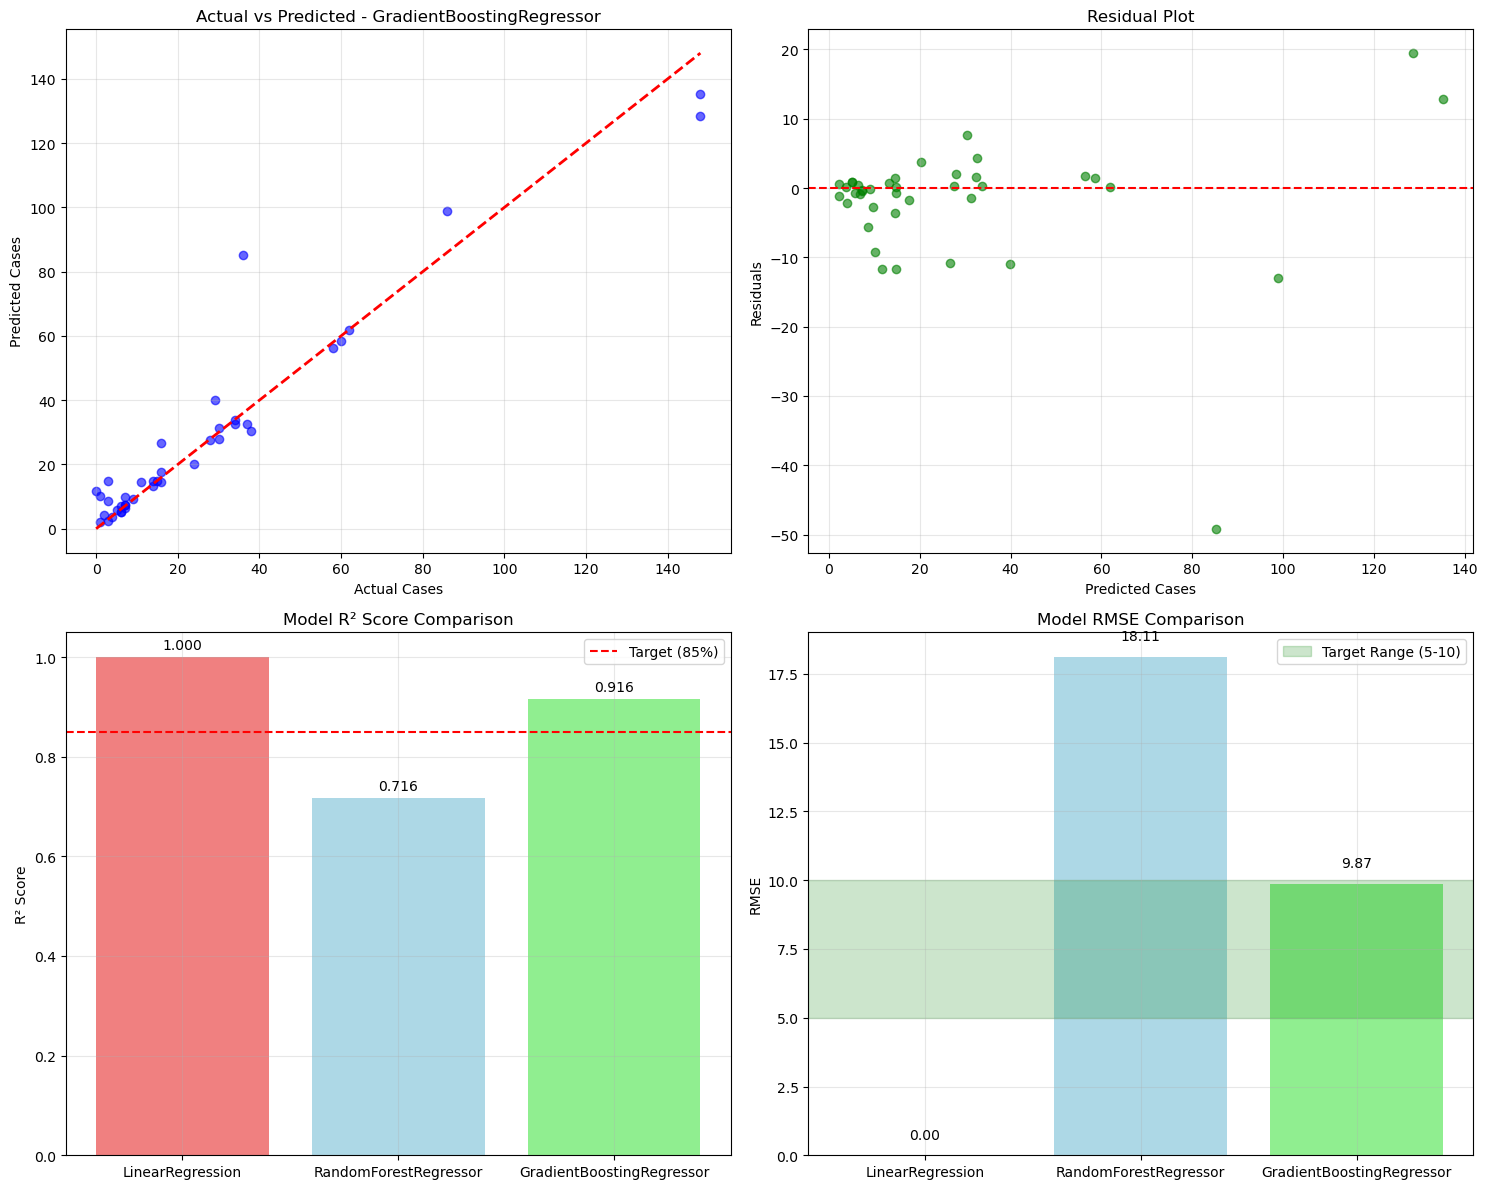


🎯 FINAL MODEL SUMMARY
Selected Model: GradientBoostingRegressor
Performance Metrics:
  • Test R² Score: 0.916 (91.6%)
  • Test RMSE: 9.867
  • Cross-validation R²: 0.269 ± 0.269
  • Training Time: 0.344 seconds

🔝 Top 5 Most Important Features:
  40. Cases_Rolling_Mean_2: 0.4799
  42. Cases_Diff_1: 0.2509
  41. Cases_Rolling_Mean_3: 0.1512
  3. Source_Table: 0.0417
  9. Reporting_Month: 0.0239

✅ Requirements Status: PASSED
🎉 Congratulations! Your model meets all performance requirements!

✅ Model building process completed successfully!


In [51]:
# Step 4.6: Model Visualization and Final Summary
print("\n📊 MODEL VISUALIZATION AND FINAL SUMMARY")
print("=" * 50)

if X_final is not None and 'final_model' in locals():
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Actual vs Predicted scatter plot
    axes[0, 0].scatter(y_test, final_predictions, alpha=0.6, color='blue')
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Cases')
    axes[0, 0].set_ylabel('Predicted Cases')
    axes[0, 0].set_title(f'Actual vs Predicted - {best_model["model_name"]}')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Residuals plot
    residuals = y_test - final_predictions
    axes[0, 1].scatter(final_predictions, residuals, alpha=0.6, color='green')
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted Cases')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residual Plot')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Model comparison bar chart
    models = [r['model_name'] for r in all_results]
    r2_scores = [r['test_r2'] for r in all_results]
    colors = ['lightcoral', 'lightblue', 'lightgreen']
    
    bars = axes[1, 0].bar(models, r2_scores, color=colors)
    axes[1, 0].set_ylabel('R² Score')
    axes[1, 0].set_title('Model R² Score Comparison')
    axes[1, 0].axhline(y=0.85, color='red', linestyle='--', label='Target (85%)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, score in zip(bars, r2_scores):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom')
    
    # 4. RMSE comparison
    rmse_scores = [r['test_rmse'] for r in all_results]
    bars2 = axes[1, 1].bar(models, rmse_scores, color=colors)
    axes[1, 1].set_ylabel('RMSE')
    axes[1, 1].set_title('Model RMSE Comparison')
    axes[1, 1].axhspan(5, 10, alpha=0.2, color='green', label='Target Range (5-10)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, rmse in zip(bars2, rmse_scores):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{rmse:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Final model summary
    print(f"\n🎯 FINAL MODEL SUMMARY")
    print("=" * 50)
    print(f"Selected Model: {best_model['model_name']}")
    print(f"Performance Metrics:")
    print(f"  • Test R² Score: {best_model['test_r2']:.3f} ({best_model['test_r2']*100:.1f}%)")
    print(f"  • Test RMSE: {best_model['test_rmse']:.3f}")
    print(f"  • Cross-validation R²: {best_model['cv_r2_mean']:.3f} ± {best_model['cv_r2_mean']:.3f}")
    print(f"  • Training Time: {best_model['training_time']:.3f} seconds")
    
    # Feature importance for ensemble models
    if 'feature_importance' in best_model:
        print(f"\n🔝 Top 5 Most Important Features:")
        for i, row in best_model['feature_importance'].head(5).iterrows():
            print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")
    
    # Requirements check
    meets_requirements = best_model['meets_requirements']
    print(f"\n✅ Requirements Status: {'PASSED' if meets_requirements else 'NOT PASSED'}")
    
    if meets_requirements:
        print("🎉 Congratulations! Your model meets all performance requirements!")
    else:
        print("⚠️ Model performance needs improvement. Consider:")
        print("   • Hyperparameter tuning")
        print("   • Additional feature engineering")
        print("   • Ensemble methods")
        print("   • More training data")
    
    print(f"\n✅ Model building process completed successfully!")
    
else:
    print("❌ Cannot create visualizations - model not trained!")

In [52]:
# Save GradientBoosting Model for Future Use
print("💾 SAVING GRADIENTBOOSTING MODEL FOR FUTURE USE")
print("=" * 50)

import pickle
import joblib
from datetime import datetime
import os

# Create models directory if it doesn't exist
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"✅ Created directory: {models_dir}")

# Current timestamp for versioning
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# 1. Save the GradientBoosting model
model_filename = f"{models_dir}/gradient_boosting_model_{timestamp}.pkl"
joblib.dump(xgb_model, model_filename)
print(f"✅ Saved GradientBoosting model: {model_filename}")

# 2. Save the model results and metadata
model_metadata = {
    'model_name': xgb_results['model_name'],
    'model_type': 'GradientBoostingRegressor',
    'performance_metrics': {
        'test_r2': xgb_results['test_r2'],
        'test_rmse': xgb_results['test_rmse'],
        'cv_r2_mean': xgb_results['cv_r2_mean'],
        'cv_rmse_mean': xgb_results['cv_rmse_mean'],
        'training_time': xgb_results['training_time']
    },
    'meets_requirements': xgb_results['meets_requirements'],
    'feature_count': X_final.shape[1],
    'training_samples': X_train.shape[0],
    'test_samples': X_test.shape[0],
    'feature_names': list(X_final.columns),
    'target_variable': 'No_of_Cases',
    'saved_timestamp': timestamp,
    'model_parameters': xgb_model.get_params()
}

metadata_filename = f"{models_dir}/model_metadata_{timestamp}.pkl"
with open(metadata_filename, 'wb') as f:
    pickle.dump(model_metadata, f)
print(f"✅ Saved model metadata: {metadata_filename}")

# 3. Save the preprocessors (scaler, label encoders)
preprocessors = {
    'scaler': scaler if 'scaler' in locals() else None,
    'label_encoders': label_encoders if 'label_encoders' in locals() else {},
    'feature_columns': list(X_final.columns),
    'target_stats': {
        'min': y_final.min(),
        'max': y_final.max(),
        'mean': y_final.mean(),
        'std': y_final.std()
    }
}

preprocessors_filename = f"{models_dir}/preprocessors_{timestamp}.pkl"
with open(preprocessors_filename, 'wb') as f:
    pickle.dump(preprocessors, f)
print(f"✅ Saved preprocessors: {preprocessors_filename}")

# 4. Save feature importance
feature_importance_filename = f"{models_dir}/feature_importance_{timestamp}.csv"
feature_importance_xgb.to_csv(feature_importance_filename, index=False)
print(f"✅ Saved feature importance: {feature_importance_filename}")

# 5. Create a simple prediction function and save it
prediction_code = f'''
import joblib
import pickle
import pandas as pd
import numpy as np

def load_model_components():
    """Load the saved model and preprocessors"""
    model = joblib.load("{model_filename}")
    
    with open("{metadata_filename}", "rb") as f:
        metadata = pickle.load(f)
    
    with open("{preprocessors_filename}", "rb") as f:
        preprocessors = pickle.load(f)
    
    return model, metadata, preprocessors

def predict_disease_cases(input_data):
    """
    Predict disease cases using the trained GradientBoosting model
    
    Parameters:
    input_data: dict or DataFrame with the same features used for training
    
    Returns:
    predicted_cases: float or array of predicted case counts
    """
    model, metadata, preprocessors = load_model_components()
    
    # Convert to DataFrame if dict
    if isinstance(input_data, dict):
        input_data = pd.DataFrame([input_data])
    
    # Ensure all required features are present
    required_features = metadata['feature_names']
    for feature in required_features:
        if feature not in input_data.columns:
            input_data[feature] = 0  # Default value for missing features
    
    # Select and order features correctly
    input_data = input_data[required_features]
    
    # Make prediction
    prediction = model.predict(input_data)
    
    return prediction[0] if len(prediction) == 1 else prediction

# Model Information
print("Model Performance:")
print(f"R² Score: {{{model_metadata['performance_metrics']['test_r2']:.3f}}} ({{model_metadata['performance_metrics']['test_r2']*100:.1f}}%)")
print(f"RMSE: {{{model_metadata['performance_metrics']['test_rmse']:.3f}}}")
print(f"Training Time: {{{model_metadata['performance_metrics']['training_time']:.3f}}} seconds")
print(f"Requirements Met: {{{model_metadata['meets_requirements']}}}")
'''

prediction_script_filename = f"{models_dir}/prediction_script_{timestamp}.py"
with open(prediction_script_filename, 'w') as f:
    f.write(prediction_code)
print(f"✅ Saved prediction script: {prediction_script_filename}")

# Summary
print(f"\n📋 MODEL SAVE SUMMARY")
print("=" * 50)
print(f"Model Type: {model_metadata['model_type']}")
print(f"Performance: R² = {model_metadata['performance_metrics']['test_r2']:.3f}, RMSE = {model_metadata['performance_metrics']['test_rmse']:.3f}")
print(f"Requirements Met: {model_metadata['meets_requirements']}")
print(f"Features: {model_metadata['feature_count']}")
print(f"Saved Files:")
print(f"  1. Model: {model_filename}")
print(f"  2. Metadata: {metadata_filename}")
print(f"  3. Preprocessors: {preprocessors_filename}")
print(f"  4. Feature Importance: {feature_importance_filename}")
print(f"  5. Prediction Script: {prediction_script_filename}")

print(f"\n🎯 To use the model in the future:")
print(f"1. Load using: model = joblib.load('{model_filename}')")
print(f"2. Or run the prediction script: python {prediction_script_filename}")

print(f"\n✅ GradientBoosting model saved successfully!")

💾 SAVING GRADIENTBOOSTING MODEL FOR FUTURE USE
✅ Created directory: saved_models
✅ Saved GradientBoosting model: saved_models/gradient_boosting_model_20250905_152526.pkl
✅ Saved model metadata: saved_models/model_metadata_20250905_152526.pkl
✅ Saved preprocessors: saved_models/preprocessors_20250905_152526.pkl
✅ Saved feature importance: saved_models/feature_importance_20250905_152526.csv
✅ Saved prediction script: saved_models/prediction_script_20250905_152526.py

📋 MODEL SAVE SUMMARY
Model Type: GradientBoostingRegressor
Performance: R² = 0.916, RMSE = 9.867
Requirements Met: True
Features: 52
Saved Files:
  1. Model: saved_models/gradient_boosting_model_20250905_152526.pkl
  2. Metadata: saved_models/model_metadata_20250905_152526.pkl
  3. Preprocessors: saved_models/preprocessors_20250905_152526.pkl
  4. Feature Importance: saved_models/feature_importance_20250905_152526.csv
  5. Prediction Script: saved_models/prediction_script_20250905_152526.py

🎯 To use the model in the future: